In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_8_descriptive = get_prompt("descriptive", 8)
prompt_8_natural = get_prompt("natural", 8)

prompt_8_descriptive, prompt_8_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. You do not need to do any analysis of the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the 300K simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_8_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_104435",
    "top_file": "1LYZ_104435",
    "target_frames": "first"
  }
}
```Next, I need to find any known binding or active sites.

Action:
```
{
  "action": "GetBindingSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```
Next, I need to simulate for 1ps at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_104435",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",

System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7fd85562bbd0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...
Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...
Simulating...
Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_127/simulations/NVT_1LYZ_104451_20250124_104455.py
['LOG_sim0_104455_1LYZ_104451_20250124_104456.txt', 'TOP_sim0_103348_1LYZ_103343_20250124_103348.pdb', 'TRAJ_sim0_103348_1LYZ_103343_20250124_103348.dcd', 'TOP_sim0_104455_1LYZ_104451_20250124_104456.pdb', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'prompt5-Copy1.ipynb', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'LOG_sim0_103348_1LYZ_103343_20250124_103348.txt', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'TRAJ_sim0_104455_1LYZ_104451_20250124_104456.dcd', 'prompt5.ipynb']
Though

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_104435: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_104435
 rec0_104439: dssp values for trajectory with id: 1LYZ_104435
 1LYZ_104451: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_104455: Initial positions for simulation sim0_104455
 sim0_104455: Basic Simulation of Protein 1LYZ_104451
 rec0_104456: Simulation trajectory for protein 1LYZ_104451 and simulation sim0_104455
 rec1_104456: Simulation state log for protein 1LYZ_104451 and simulation sim0_104455
 rec2_104456: Simulation pdb frames for protein 1LYZ_104451 and simulation sim0_104455
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_104505: RMSD plot for 1LYZ
 rgy_rec0_104456: Radii of gyration per frame for rec0_104456
 fig0_104506: Plot of radii of gyration over time for rec0_104456
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_104508: Plot of SASA over time for 1LYZ
 top_sim0_104512: Initial positions for simulation si

In [24]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_104435"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_104435", target_frames="first")

In [32]:
# make sure the sites were found
from mdagent.tools.base_tools import GetBindingSites

get_known_sites = GetBindingSites()
get_known_sites._run(query="1LYZ", primary_accession="")

'[]'

In [26]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_104456")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_104455")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

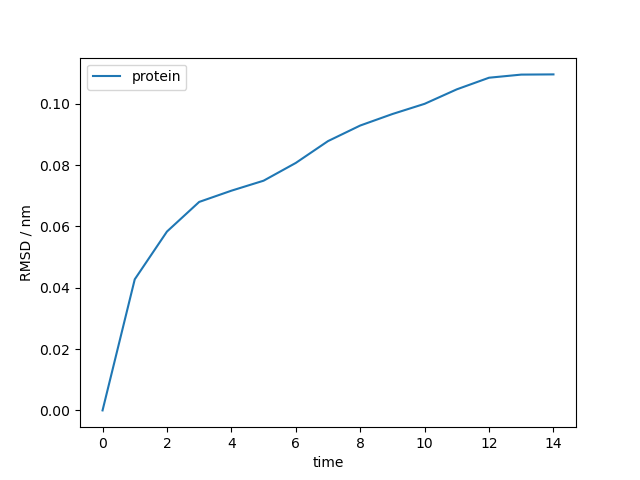

In [27]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104505'))

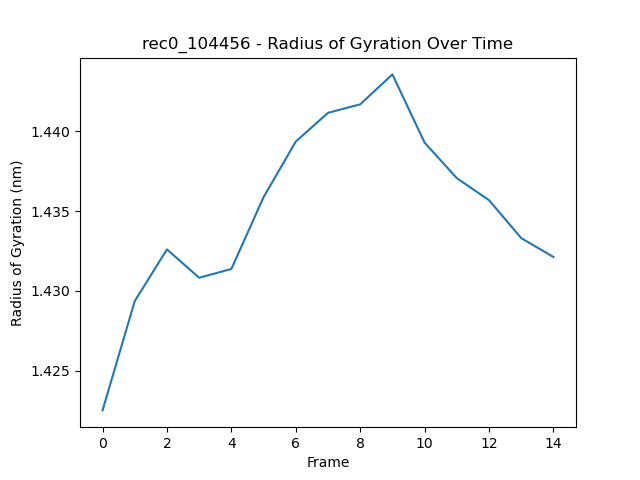

In [28]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104506'))

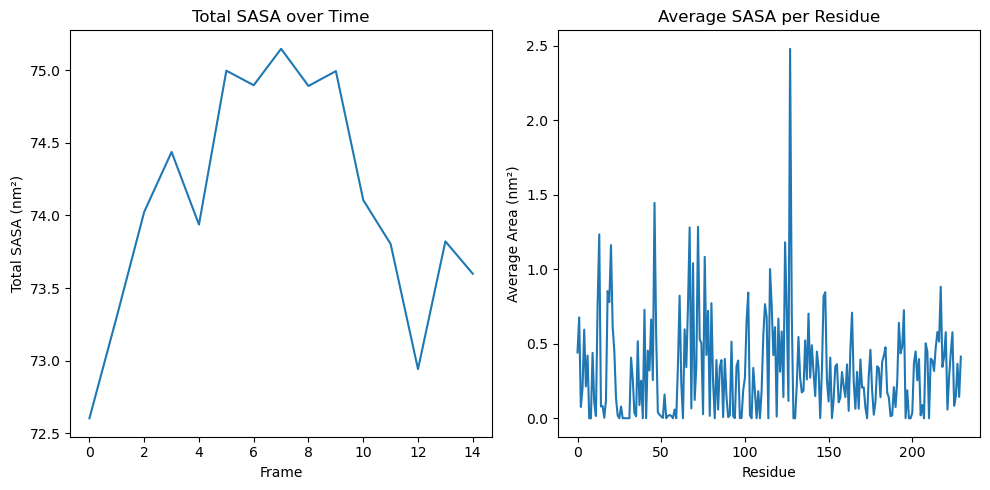

In [29]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104508'))

In [31]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_104513")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_104512")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_8_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it at 300K and 400K for 1ps each. After that, I can compute the secondary structure assignments, RMSD, SASA, and radius of gyration for the 300K simulation. I also need to find any known binding or active sites.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can simulate it at 300K and 400K for 1ps each. I will use the SetUpandRunFunction tool to set up and run the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_104529",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [15]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_104529: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_104529
 1LYZ_104536: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_104540: Initial positions for simulation sim0_104540
 sim0_104540: Basic Simulation of Protein 1LYZ_104536
 rec0_104540: Simulation trajectory for protein 1LYZ_104536 and simulation sim0_104540
 rec1_104540: Simulation state log for protein 1LYZ_104536 and simulation sim0_104540
 rec2_104540: Simulation pdb frames for protein 1LYZ_104536 and simulation sim0_104540
 rec0_104602: dssp values for trajectory with id: rec0_104540
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_104605: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_104609: Plot of SASA over time for 1LYZ
 rgy_rec0_104540: Radii of gyration per frame for rec0_104540
 fig0_104612: Plot of radii of gyration over time for rec0_104540
 top_sim0_104

In [33]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_104529"))

In [34]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_104529", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [40]:
# make sure the binding sites were found
from mdagent.tools.base_tools import GetBindingSites

get_known_sites = GetBindingSites()
get_known_sites._run(query="1LYZ", primary_accession="P00720")

The primary accession number provided does not match any entry in the data, using the first entry instead.


'[]'

In [41]:
# make sure the active sites were found
from mdagent.tools.base_tools import GetActiveSites

get_known_sites = GetActiveSites()
get_known_sites._run(query="1LYZ", primary_accession="P00720")

The primary accession number provided does not match any entry in the data, using the first entry instead.


"[{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]"

In [35]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_104540")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_104540")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

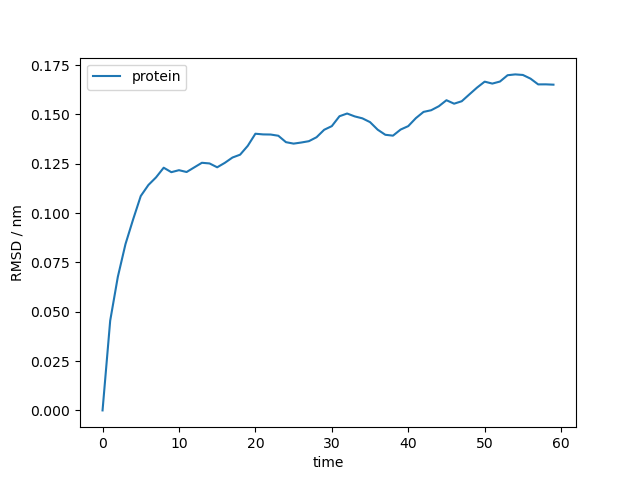

In [36]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104605'))

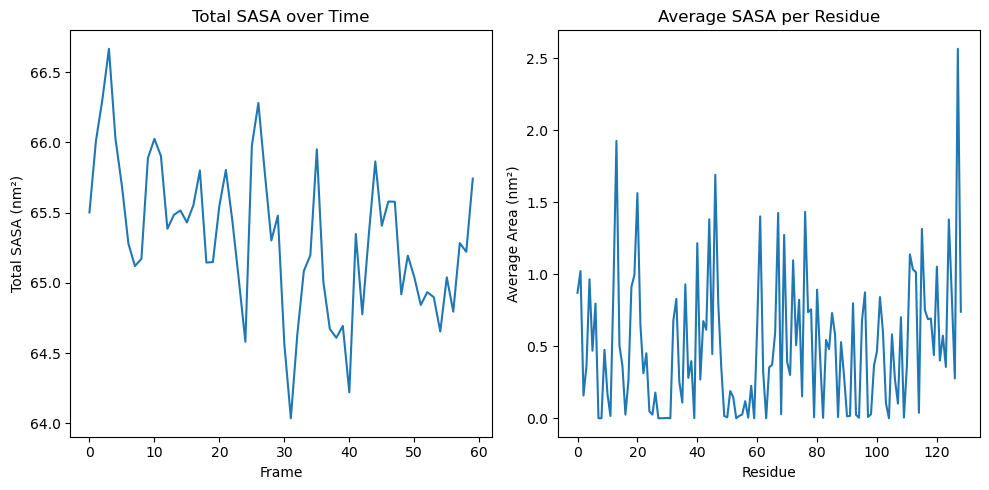

In [37]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104609'))

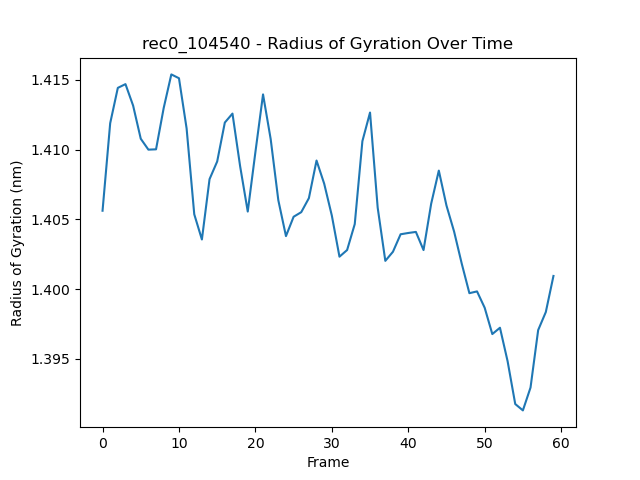

In [38]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104612'))

In [39]:
# make sure trajectory and topology exist (sim2)
traj_path_2_2 = registry_2.get_mapped_path("rec0_104619")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_104618")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)